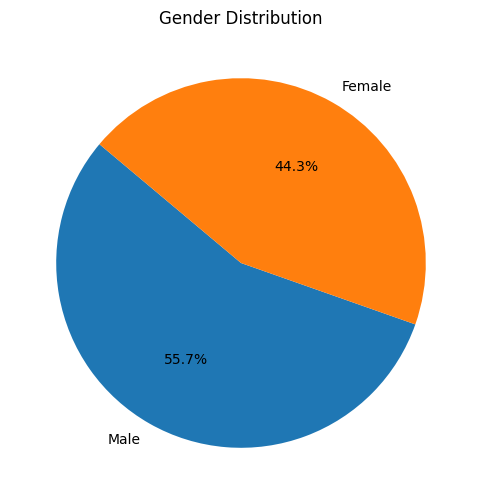

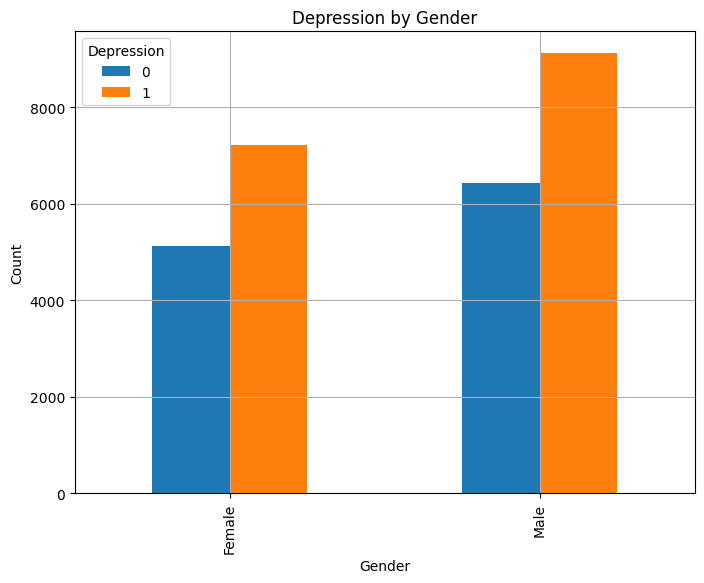

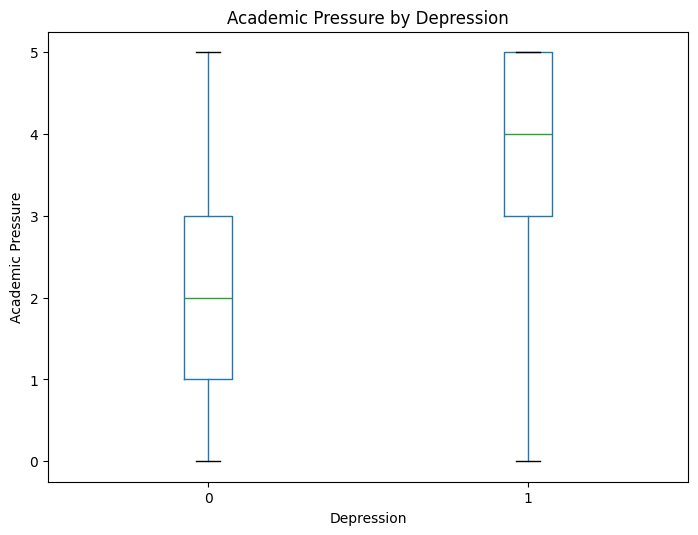

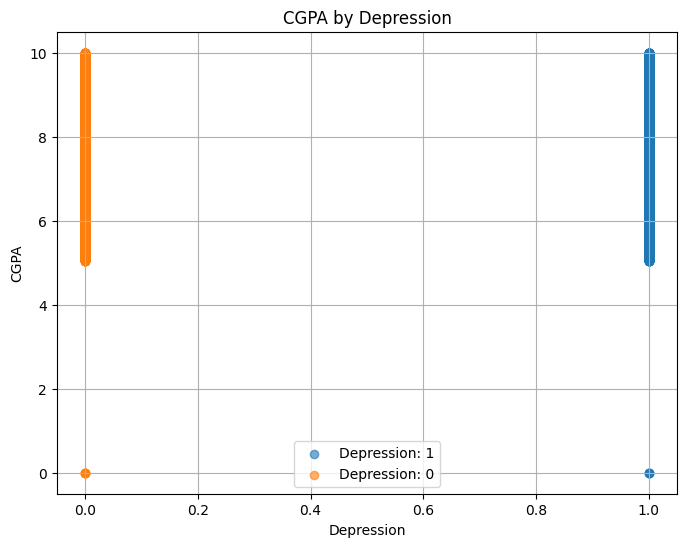

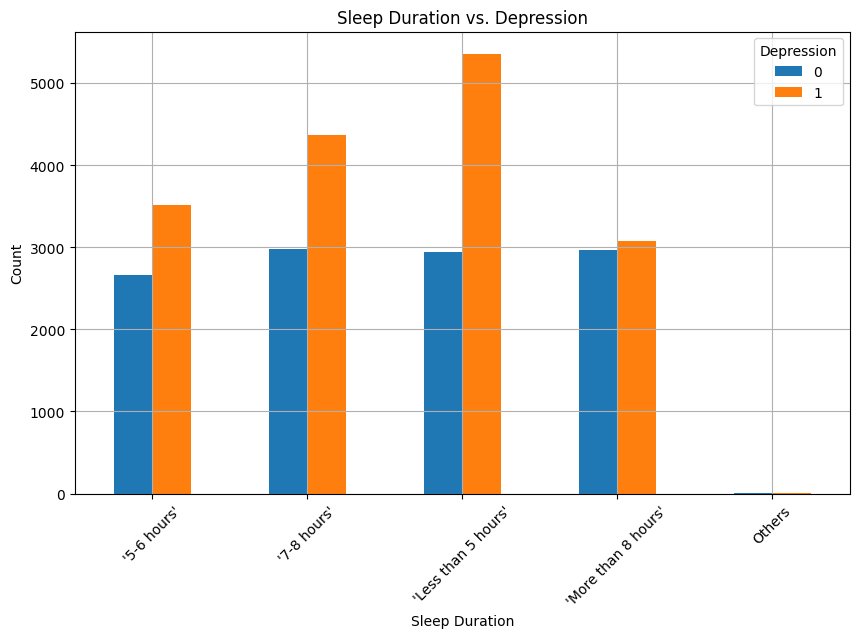

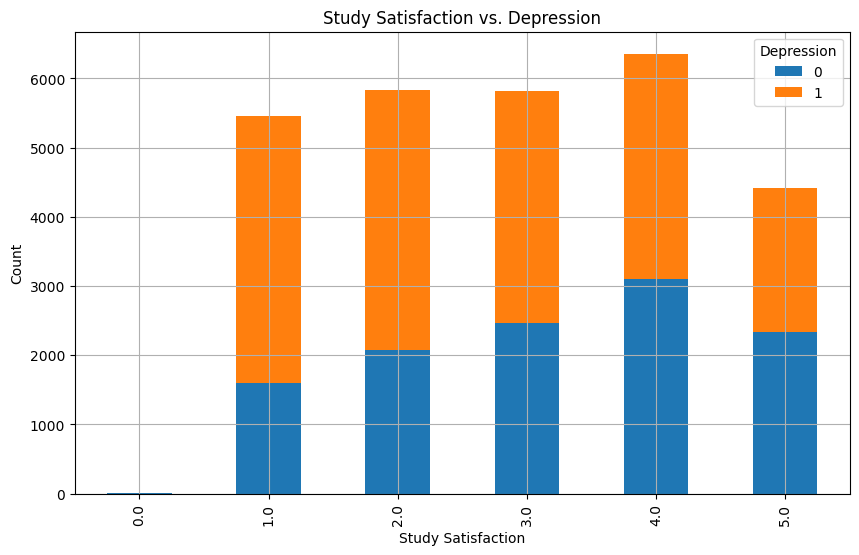

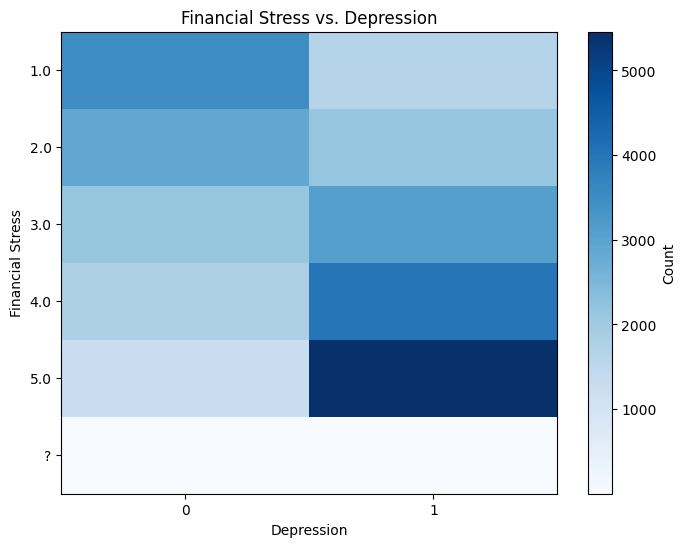

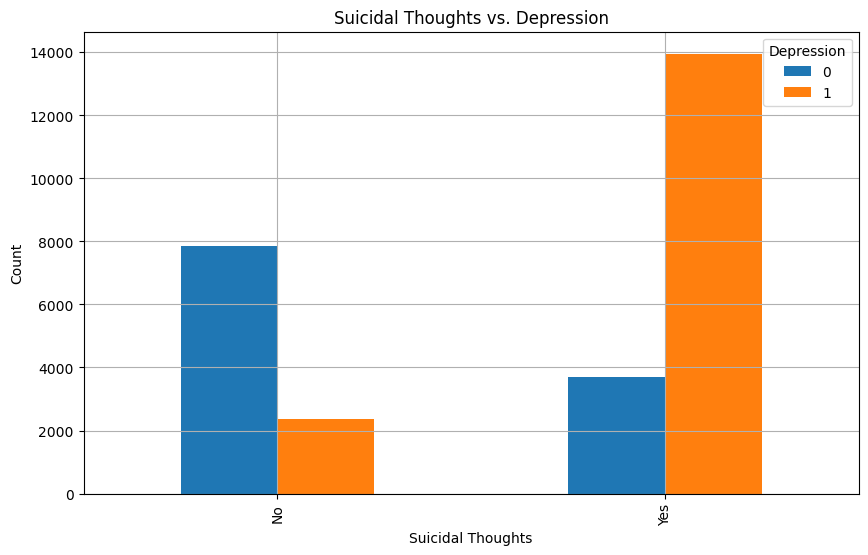

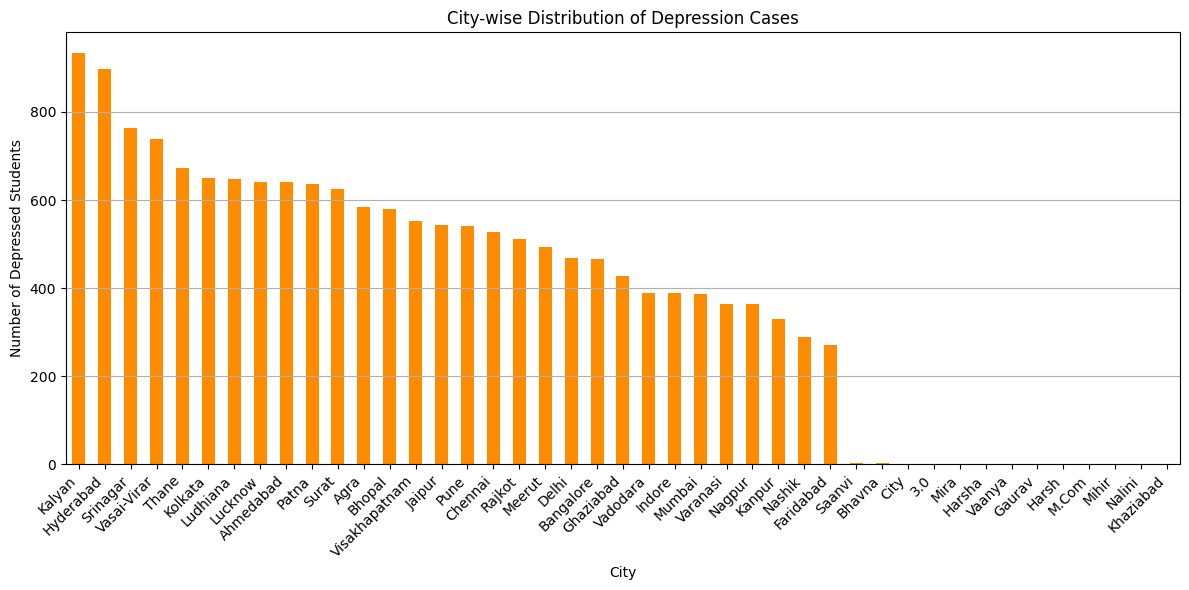

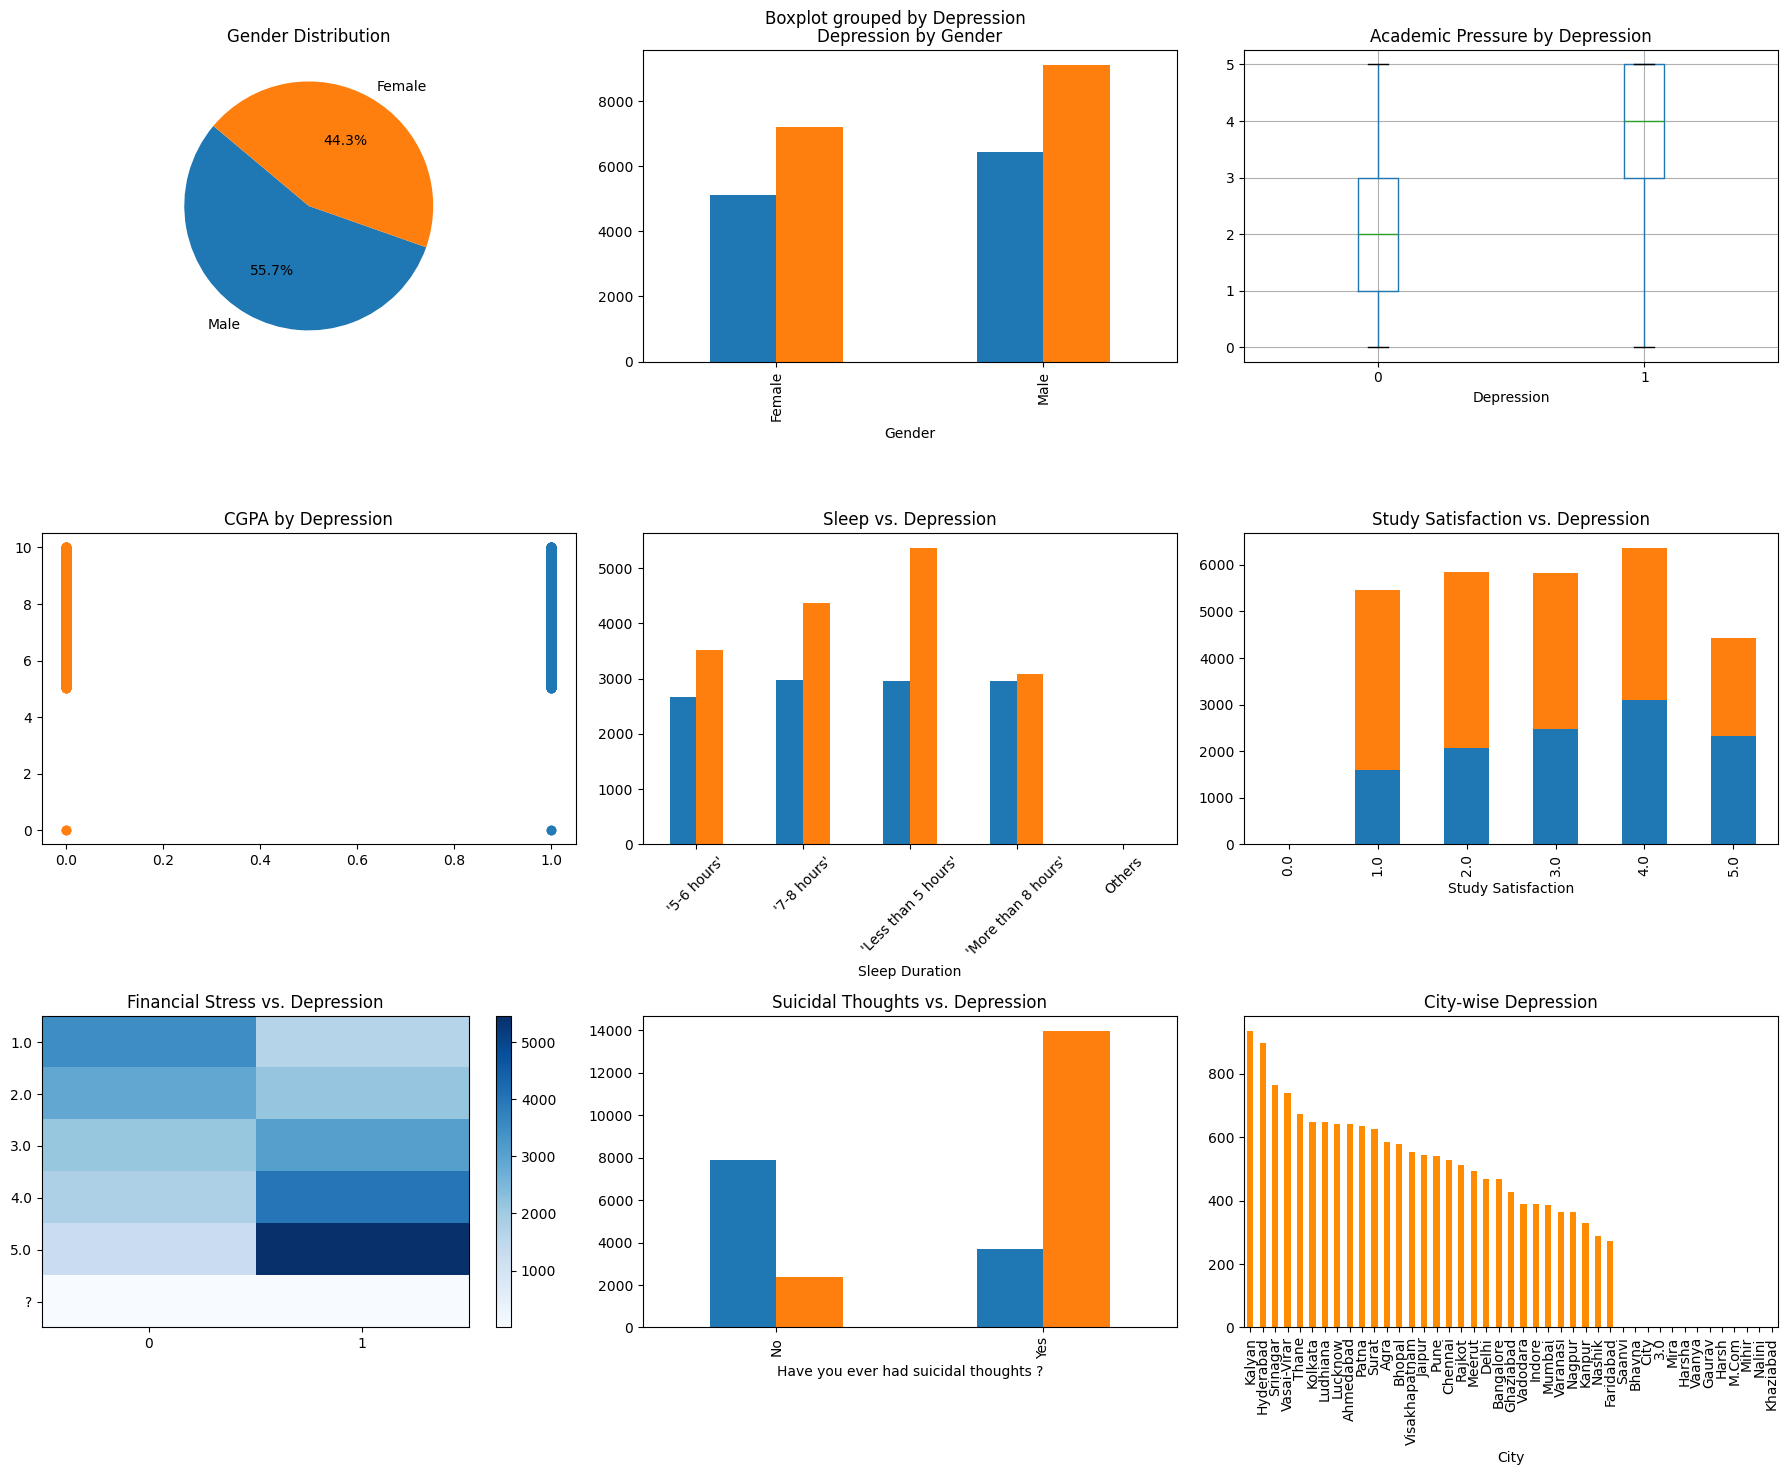

In [7]:
# ✅ For Jupyter: ensure inline plotting
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# ✅ Load the dataset (ensure it's uploaded in the same folder as your notebook)
df = pd.read_csv("student_depression_dataset.csv")
df.columns = df.columns.str.strip()

# --- CHART 1: Gender Distribution ---
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

# --- CHART 2: Depression by Gender ---
gender_dep = df.groupby(['Gender', 'Depression']).size().unstack()
gender_dep.plot(kind='bar', figsize=(8, 6), title='Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# --- CHART 3: Academic Pressure by Depression ---
df.boxplot(column='Academic Pressure', by='Depression', grid=False, figsize=(8, 6))
plt.title('Academic Pressure by Depression')
plt.suptitle('')
plt.xlabel('Depression')
plt.ylabel('Academic Pressure')
plt.show()

# --- CHART 4: CGPA Strip Plot by Depression ---
plt.figure(figsize=(8, 6))
for d in df['Depression'].unique():
    y = df[df['Depression'] == d]['CGPA']
    x = [d] * len(y)
    plt.scatter(x, y, alpha=0.6, label=f'Depression: {d}')
plt.title('CGPA by Depression')
plt.xlabel('Depression')
plt.ylabel('CGPA')
plt.legend()
plt.grid(True)
plt.show()

# --- CHART 5: Sleep Duration vs. Depression ---
sleep_counts = pd.crosstab(df['Sleep Duration'], df['Depression'])
sleep_counts.plot(kind='bar', figsize=(10, 6), title='Sleep Duration vs. Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# --- CHART 6: Study Satisfaction vs. Depression ---
study_sat = pd.crosstab(df['Study Satisfaction'], df['Depression'])
study_sat.plot(kind='bar', stacked=True, figsize=(10, 6), title='Study Satisfaction vs. Depression')
plt.xlabel('Study Satisfaction')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# --- CHART 7: Financial Stress vs. Depression (Heatmap-like) ---
stress_table = pd.crosstab(df['Financial Stress'], df['Depression'])
plt.figure(figsize=(8, 6))
plt.imshow(stress_table, cmap='Blues', aspect='auto')
plt.title('Financial Stress vs. Depression')
plt.xlabel('Depression')
plt.ylabel('Financial Stress')
plt.colorbar(label='Count')
plt.xticks(range(len(stress_table.columns)), stress_table.columns)
plt.yticks(range(len(stress_table.index)), stress_table.index)
plt.grid(False)
plt.show()

# --- CHART 8: Suicidal Thoughts vs. Depression ---
suicide_dep = pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'])
suicide_dep.plot(kind='bar', figsize=(10, 6), title='Suicidal Thoughts vs. Depression')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# --- CHART 9: City-wise Depression Distribution (Map-Like) ---
city_depression = df[df['Depression'] == 1]['City'].value_counts()
plt.figure(figsize=(12, 6))
city_depression.plot(kind='bar', color='darkorange')
plt.title('City-wise Distribution of Depression Cases')
plt.xlabel('City')
plt.ylabel('Number of Depressed Students')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- CHART 10: Summary Dashboard (at the end) ---
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Student Depression Summary Dashboard', fontsize=20)

# Pie Chart
axs[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Gender Distribution')

# Bar Chart
gender_dep.plot(kind='bar', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Depression by Gender')

# Boxplot
df.boxplot(column='Academic Pressure', by='Depression', ax=axs[0, 2])
axs[0, 2].set_title('Academic Pressure by Depression')
fig.subplots_adjust(top=0.9)

# Strip Plot
for d in df['Depression'].unique():
    y = df[df['Depression'] == d]['CGPA']
    x = [d] * len(y)
    axs[1, 0].scatter(x, y, alpha=0.6, label=f'Dep: {d}')
axs[1, 0].set_title('CGPA by Depression')

# Sleep Duration
sleep_counts.plot(kind='bar', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Sleep vs. Depression')
axs[1, 1].tick_params(axis='x', rotation=45)

# Study Satisfaction
study_sat.plot(kind='bar', stacked=True, ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Study Satisfaction vs. Depression')

# Financial Stress
im = axs[2, 0].imshow(stress_table, cmap='Blues', aspect='auto')
axs[2, 0].set_title('Financial Stress vs. Depression')
axs[2, 0].set_xticks(range(len(stress_table.columns)))
axs[2, 0].set_xticklabels(stress_table.columns)
axs[2, 0].set_yticks(range(len(stress_table.index)))
axs[2, 0].set_yticklabels(stress_table.index)
fig.colorbar(im, ax=axs[2, 0])

# Suicidal Thoughts
suicide_dep.plot(kind='bar', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Suicidal Thoughts vs. Depression')

# City Distribution
city_depression.plot(kind='bar', ax=axs[2, 2], color='darkorange', legend=False)
axs[2, 2].set_title('City-wise Depression')
axs[2, 2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
